# D212 - OFM3 TASK 1: CLUSTERING TECHNIQUES

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1a9060c5-29cd-42f9-8532-ad4c009711aa" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1a9060c5-29cd-42f9-8532-ad4c009711aa

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Exploring the Data

#### Importing Libraries:

In [1]:
#importing the needed libraries.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #modified Pandas options to fully display the large dataset when needed
## !!! Trying to Display a full Dataframe may cause a problem.
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the Data file (As received) churn_clean.csv 
df_raw= pd.read_csv('churn_clean.csv')
target='Churn'
df_raw.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


#### Data info:

In [3]:
df_raw.info() #Data Information of the Raw DataFrame (As received)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
raw_variables=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
               'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
               'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
               'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
               'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
               'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
               'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
               'Item6', 'Item7', 'Item8']

num_variables = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children',
                 'Age','Income', 'Outage_sec_perweek', 'Email', 'Contacts',
                 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
                 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

categ_variables = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
                   'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract',
                   'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

print('raw_variables:',len(raw_variables),'  num_variables:',len(num_variables),'  cat_variables:',len(categ_variables))

raw_variables: 50   num_variables: 23   cat_variables: 27


#### Summary statistics:

In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.000000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.640660
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082813,-87.918800,-80.088745,-65.667850
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.000000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.000000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.700000
Outage_sec_perweek,10000.0,10.001848,2.976019,0.099747,8.018214,10.018560,11.969485,21.207230
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.000000


In [6]:
df_raw.describe(include='object',exclude='number').T

,count,unique,top,freq
Customer_id,10000,10000,A378200,1
Interaction,10000,10000,af3767d7-4cca-4261-af13-c28d0339ead7,1
UID,10000,10000,c6045bdb5c9d4564f3c5ebbcfd38fe41,1
City,10000,6058,Houston,34
State,10000,52,TX,603
County,10000,1620,Washington,111
Area,10000,3,Suburban,3346
TimeZone,10000,25,America/New_York,4072
Job,10000,639,Occupational psychologist,30
Marital,10000,5,Divorced,2092


In [7]:
'''
Variables Correlation:
*Function plot_corr_ellipses() imported and modified From text Book 
"Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python",(Bruce et al.,2020) 
- The associated GitHub code repository
https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb
From text Book "Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python"
The associated GitHub code repository 
'''

from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
        ax.grid (True, color = "grey", linewidth = "0.5", linestyle = "-")
    return ec

In [8]:
'''
Custom function to convert categorical variables into numeric form.
this function takes 1 parameters, input DataFrame and creates a dectionary for each categorical variable
where dictinary keys are the categogries sorted alphabetically and the values are serial numeric values
the maximum number of categories this function can handle is 7000
'''
def cat2num(df_1):
    numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_conv=df_1.copy()
    for n, col in enumerate(df_num_conv.columns):
        if (df_num_conv[col].dtype in numerics) or (len(df_num_conv[col].value_counts())>7000):
            continue
        else:
            cat_dict={y:x for x,y in enumerate(dict(df_raw[col].value_counts().sort_index(ascending=True)))}
            df_num_conv[col]=df_num_conv[col].replace(cat_dict)
    return df_num_conv

In [9]:
# To be able to correlate with the categorical variables
df_num=cat2num(df_raw)

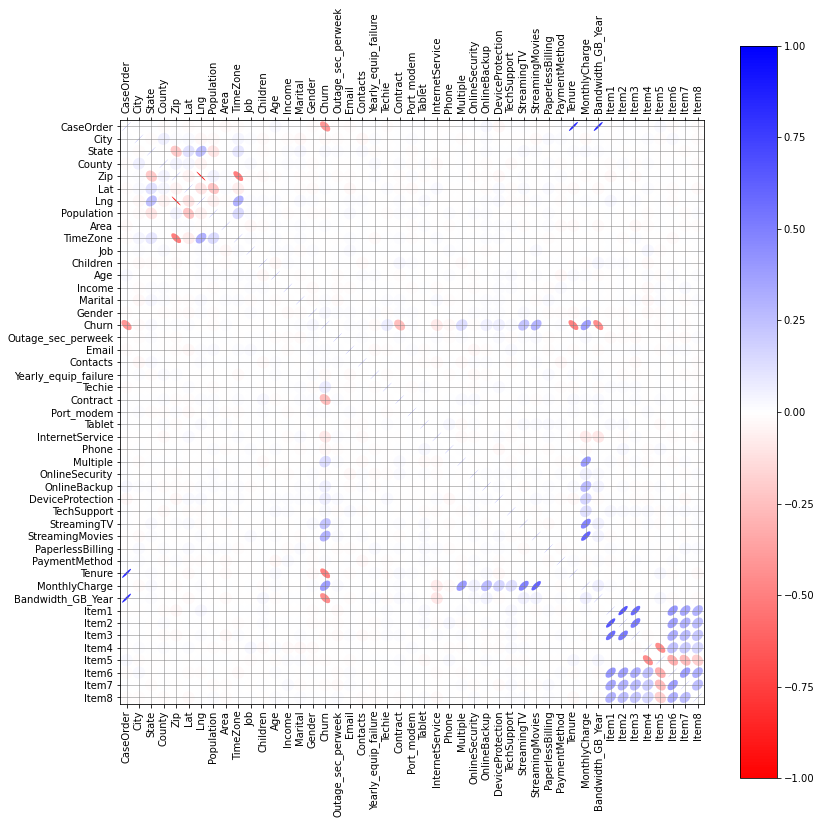

In [10]:
ax= plot_corr_ellipses(df_num.corr(), figsize=(12, 12), cmap='bwr_r')
plt.colorbar(ax)
plt.tight_layout()
plt.show()

#### Part I: Research Question

##### A.  Describe the purpose of this data mining report by doing the following:

##### 1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques:
##### •  k-means
##### •  hierarchical

“Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many providers, retaining highly profitable customers is the number one business goal. To reduce customer churn, telecommunications companies need to predict which customers are at high risk of churn.” (WGU-D212, 2021)

The company is interested in classifying customers (clustering) into groups (clusters) that may represent or highlight the churn probability.

Clustering analysis would give the company and the stakeholders a good idea about which groups of customers are more likely to churn.

The question to be asked is about recognizing which groups of customers have a high or low probability for Churn, in other words, can customers be segmented into groups that can predict customers’ Churn?

k-means clustering method will be used for customer segmentation that might be correlated to the customers’ churn probability.

##### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
 

The objective of the data analysis is to classify customers based on the available features or criteria into groups that can be used to predict the customer churn probability.

------------------------------------------------------------------------------------

#### Part II: Technique Justification

##### B.  Explain the reasons for your chosen clustering technique from part A1 by doing the following:

##### 1.  Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.

K-Means is a centroid-based clustering, grouping a set of data observations in groups that are more similar to each other than to observations in other clusters. The similarity is a metric that reflects the strength of the relationship between two data observations.
K-Means uses an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.

The algorithm works by (Paul, 2018):

1. Taking randomly a number of centroids or data points equal to a predefined number of expected clusters in its account initially, each centroid represents an initial estimation of the center of a specific cluster.

2. The data points (coordinates) are assigned to any of the Clusters depending upon the distance between them and the centroids (distances represent dissimilarity).

3. Each cluster will be used to determine a refined centroid of the cluster, and the distances will be recalculated and each point will be reassigned to a specific cluster accordingly.

4. This process will be repeated several times (iteratively) updating cluster centroids until they cannot be updated anymore ( when there is no improvement in the measured distances or errors).

5. K-Means can use these centroids as a model that can be applied to some data the algorithm has not seen before for prediction.

##### 2.  Summarize one assumption of the clustering technique.

K-Means Clustering assumes that clusters are spatially grouped or spherical (Tait,2017).

Because it depends on minimizing the distances between the centroid of the cluster and the cluster members.

Spherical assumption helps in separating the clusters when the algorithm works on the data and forms clusters, this means that it’s difficult for the algorithm (initially) to classify complex clusters that may not depend on simple distance measurements.

##### 3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

Selected Python, the general-purpose, interpreted, object-oriented language, which supports many useful packages for creating linear models Selected Python libraries such as:

* Pandas : For data manipulation and analysis.
* numpy : The core of every analytical solution in the Python language. It provides the user with multidimensional arrays, along with a large set of functions to operate multiple mathematical operations on these arrays.
* Matplotlib: for visualization
* Scikit-learn: Offers the functions for data preprocessing, supervised and unsupervised learning, model selection, validation, and error metrics.

from Scikit-learn library a set of functions have been imported and used such as:

* cluster.KMeans : the class of KMeans clustering.
* preprocessing.StandardScaler : for features standardiziation

----------------------------------------------------------------------------

 

#### Part III: Data Preparation

##### C.  Perform data preparation for the chosen dataset by doing the following

##### 1.  Describe one data preprocessing goal relevant to the clustering technique from part A1.

Given that the data provided is clean, with no missing data, the K-means algorism needed some data preparations such as:

* Selecting and using only the relevant features (the significant variables).
* Getting the categorical features as dummy variables for utilizing the categorical variables, to use only the most relevant components out of them.
* K-means is very sensitive to features homogeneity: while building a k-means clustering model using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale since absolute differences in features weigh the same.

##### 2.  Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

* Dropping the irrelevant features (the insignificant variables).
Features related to customer ID , or cutomer location in addition to Job column:

['CaseOrder','Customer_id','UID','Interaction','City','State','County','Zip','Lng','Lat','Population','Area','TimeZone','Job']


* The clustering model will be built using the moset relevant features , after pre-processing

['Tenure','Bandwidth_GB_Year','Contract_One year', 'Contract_Two Year', 'StreamingMovies_Yes']

##### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

1- Dropping the irrelevant features.

In [11]:
#Dropping irrelevant columns
df_ed=df_raw.copy()
drop_cols = ['CaseOrder','Customer_id','UID','Interaction','City','State','County','Zip','Lng','Lat','Population','Area','TimeZone','Job' ] #,
df_ed.drop(columns=drop_cols,inplace=True)

In [12]:
X=df_ed.copy()
X=X.drop([target],axis=1) #dropping te target column from the predictors data set
y=df_ed[target] # assigning the target to vector y

2- Getting the categorical features as dummy variables for utilizing the categorical variables,to use only the most relevant component out of them.

In [13]:
# Adding dummy variables
dummy_cols = [dummy for dummy in categ_variables if dummy in X.columns]
X=pd.get_dummies(X,drop_first=True,columns=dummy_cols)

3- Selecting only the relevant features (the significant variables)

In [14]:
X=X.loc[:,['Tenure','Bandwidth_GB_Year','Contract_One year', 'Contract_Two Year', 'StreamingMovies_Yes']]

4- Features standardiziation

In [15]:
scaler = StandardScaler()
scaler.fit(X)
X_Standard = scaler.transform(X)
X_Standard=pd.DataFrame(X_Standard, columns=X.columns)

##### 4.  Provide a copy of the cleaned dataset.

In [16]:
# Saving a copy of the prepared data set.
D212_t1_input=X_Standard.copy()
D212_t1_input.to_csv('D212_t1_clustering_input.csv', index = True)

------------------------------------------------------------------------------------------------

 

#### Part IV: Analysis

##### D.  Perform the data analysis and report on the results by doing the following:

##### 1.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

Steps of K-means clustering:

1- preparing the input data by Dropping the irrelevant features (the insignificant variables).
and Getting the categorical features as dummy variables for utilizing the categorical variables, to use only the most relevant component out of them.

2- Input data features standardization.

3- Splitting the input data into a training set (70%) and a testing set(30%)

4- Optimizing the algorithm hyperparameter (n_clusters) using the elbow method.

5- Fitting the model using the training data set using the optimum number of clusters from step 4.

6- (Optional) Testing the efficiency of the cluster in identifying the target values of the testing data set.


##### 2.  Provide the code used to perform the clustering analysis technique from part 2.
 

3- Splitting the input data into a training set (70%) and a testing set(30%)

In [17]:
# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Standard, y, test_size = 0.30)

4- Optimizing the algorithm hyperparameter (n_clusters) using the elbow method.

The optimum number of clusters is at the elbow point (the sharp corner) , lowest number of clusters that is close to minimum sum of error for all clusters.

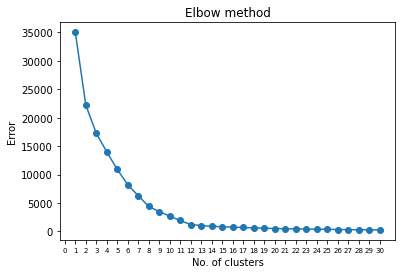

Wall time: 34.5 s


In [18]:
%%time

Error =[]
max_clusters = 31
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters = i,random_state=1).fit(X_train)
    Error.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), Error,'-o')
plt.xticks(np.arange(0,max_clusters,step=1))
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.xticks(fontsize = 7)
plt.show()


5- Fitting the model using the training data set using the optimum number of clusters from step 4.

In [19]:
kmeans = KMeans(n_clusters = 12,random_state=1).fit(X_train)
kmeans.labels_

array([2, 1, 1, ..., 1, 0, 0])

6- (Optional) Testing the efficiency of the cluster in identifying the target values of the testing data set.

In [20]:
'''
Custom function , takes 2 arguments :
1- actual target that need to be tested relative to clustering
2- K_mean clusters labels (clusters or predicted)
The output is a count plot , shows the relatioship between the actual target and the K_mean clusters
'''
def clustering_countplot(ytest,ypredict):
    plt.figure(figsize=(12,3))
    sns.countplot(x = (ypredict),hue = np.array(ytest.iloc[:,0]),alpha=0.7)
    plt.xlabel('Clusters')
    plt.title('Clusters Vs Actual. '+target)
    plt.xticks(fontsize = 7)
    plt.show()

In [21]:
y_test=pd.get_dummies(y_test,drop_first=True,columns=target)

y_train=pd.get_dummies(y_train,drop_first=True,columns=target)

y=pd.get_dummies(y,drop_first=True,columns=target)

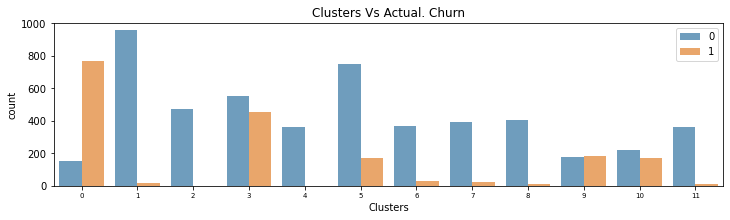

In [22]:
#clustering_countplot of Train data
clustering_countplot((y_train),kmeans.labels_)

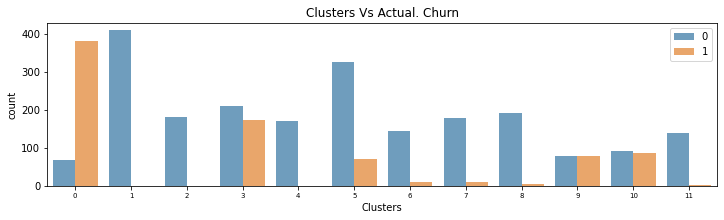

In [23]:
#clustering_countplot of Test data
clustering_countplot((y_test),kmeans.predict(X_test))

---------------------------------------------------------------------------------------

#### Part V: Data Summary and Implications

##### E.  Summarize your data analysis by doing the following:

##### 1.  Explain the accuracy of your clustering technique.

The accuracy of K-Means Clustering is difficult to be explained, like most unsupervised learning techniques, the clustering is inputs driven, and unlikely to provide an accurate prediction or specific decision, while depending on the variance of input features and maximizing the separation or segregation among these clusters according to the features combination variance regardless the meaning or the significance of this clustering.

But for the purpose of this analysis, some measures had been taken to utilize the K-Means clustering technique in customers' segmentation in relationship with the customers' Churn probability.
The  K-Means clustering technique provided a number of clusters, that can be interpreted in relationship with customers' churn probability where some clusters showed absence of any Churn case, some other clusters represented a group of customers who are very likely to churn.

These results can be viewed visually in the previous count plots, and numerically using the following cross tables, which shows the relationship between each cluster and the Churn fraction of customers assigned to this specific cluster.


In [24]:
pd.crosstab(kmeans.labels_, np.array(y_train.iloc[:,0]),normalize='index',margins=False).sort_values(by=1,ascending=False)

col_0,0,1
row_0,,
0,0.164309,0.835691
9,0.492997,0.507003
3,0.547809,0.452191
10,0.560914,0.439086
5,0.815418,0.184582
6,0.931298,0.068702
7,0.938242,0.061758
8,0.973366,0.026634
11,0.975806,0.024194


In [25]:
pd.crosstab(kmeans.predict(X_test), np.array(y_test.iloc[:,0]),normalize='index',margins=False).sort_values(by=1,ascending=False)

col_0,0,1
row_0,,
0,0.152993,0.847007
9,0.500000,0.500000
10,0.514124,0.485876
3,0.550914,0.449086
5,0.820707,0.179293
6,0.929487,0.070513
7,0.952128,0.047872
8,0.979487,0.020513
11,0.992806,0.007194


##### 2.  Discuss the results and implications of your clustering analysis.

The K-Means clustering technique provided a number of clusters, that can be interpreted in relationship with customers' churn probability where some clusters showed absence of any Churn case, some other clusters represented a group of customers who are very likely to churn.

These results can be viewed visually in the previous count plots, and numerically using the previous cross tables, which shows the relationship between each cluster and the Churn fraction of customers assigned to this specific cluster.

##### 3.  Discuss one limitation of your data analysis.

The clustering wasn’t so intuitive, specifically when using a high number of dimensions (12), the segmentation classified the customers into a predetermined number of clusters according to the variance of predetermined input features, correlating the resulted clusters with the customers’ churn probability is an inaccurate interpretation.
Overall this technique is less interpretable and more suitable for automated decision systems more than prediction or giving an intuitive insight to the stakeholders.


##### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

As the company needs to avoid customers Churn, using K-means clustering can be very beneficial for segmenting the customers in relationship with the customer’s Churn probability, by evaluating and continuously re-evaluating the variables recorded for each customer.

The K-means clustering model determined several clusters (or groups of customers) that going closer to them might mean that the customer churn probability is increasing, the company may need to recheck those customers’ degree of satisfaction.

----------------------------------------------------------------------------------------

 

#### Part VI: Demonstration

##### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
 

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1a9060c5-29cd-42f9-8532-ad4c009711aa" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1a9060c5-29cd-42f9-8532-ad4c009711aa

##### G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
 

##### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
 

##### I.  Demonstrate professional communication in the content and presentation of your submission.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### References:


* WGU. D212 Data Mining II  (2021, June 16), Data Files and Associated Dictionary Files.
https://access.wgu.edu/ASP3/aap/content/gkridh34kd85jf94dcj2.zip


* Bruce, P. C., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50 essential concepts. Sebastopol, CA: O'Reilly Media, Incorporated.


* Sayak Paul. (2018 ). K-Means Clustering in Python with scikit-learn.
https://www.datacamp.com/community/tutorials/k-means-clustering-python?fbclid=IwAR078hAiPA4WL6Wk6xSBFtPGcauFe34kuu6yBHaNBRRmQoGi1FwE6SKQKoI


* Andrew Tait. (2017 ). Assumptions Can Ruin Your K-Means Clusters. 
https://blog.learningtree.com/assumptions-ruin-k-means-clusters/


* (datacamp) Data Mining II – D212 course materials and Labs
https://learn.datacamp.com/custom-tracks/custom-data-mining-ii


* https://www.udemy.com/course/python-for-data-science-machine-learning/


* https://www.udemy.com/course/data-science-bootcamp-with-python/


* Scikit-learn Crash Course - Machine Learning Library for Python https://www.youtube.com/watch?v=0B5eIE_1vpU


* General Questions/Answers from https://stackoverflow.com/


* Documentation of Python packages: pandas, matplotlib,numpy,sklearn and scipy


* Feature Scaling in Machine Learning(Normalization & Standardization) | Feature Scaling Sklearn  https://www.youtube.com/watch?v=wNa_VI__j84 
